In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5.0, 4.0)

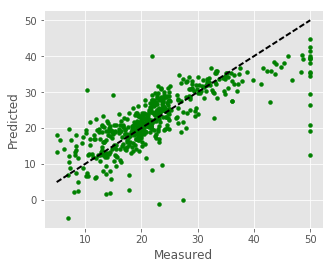

In [29]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, s=15, color='green')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [4]:
B = np.array([y]).T
C = np.array([predicted]).T
D = np.hstack((B, C))
print(D.shape)

(506, 2)


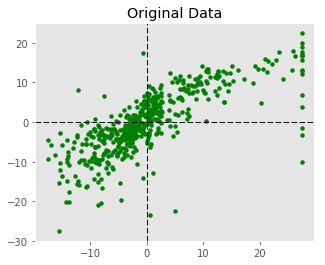

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(0, linestyle='--', color='black', linewidth=1) # horizontal lines
ax.axvline(0, linestyle='--',color='black', linewidth=1)
# ax.set_xticks([0])
# ax.set_yticks(np.arange(0.1,0.1))
plt.scatter(D[:,0], D[:,1],s=15, color='green')
plt.title("Original Data")
plt.grid(False)
plt.show()

In [6]:
D-=np.mean(D, axis=0)
cov=np.dot(D.T, D)/D.shape[0]
print(D)
print(cov)
print(cov.shape)

[[  1.46719368   7.55381741]
 [ -0.93280632   2.23666149]
 [ 12.16719368   7.86504555]
 ..., 
 [  1.36719368   5.58945891]
 [ -0.53280632   4.05314779]
 [-10.63280632   0.14582635]]
[[ 84.41955616  55.82400861]
 [ 55.82400861  61.82438195]]
(2, 2)


In [7]:
U,S,V=np.linalg.svd(cov)
Xrot=np.dot(D, U)
print(Xrot.shape)

(506, 2)


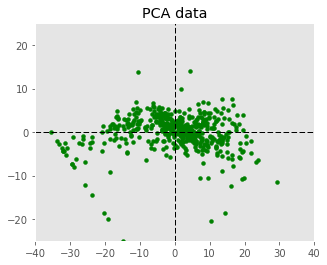

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(0, linestyle='--', color='black', linewidth=1) # horizontal lines
ax.axvline(0, linestyle='--',color='black', linewidth=1)
ax.set_xlim([-40,40])
ax.set_ylim([-25, 25])
# ax.set_xticks([0])
# ax.set_yticks(np.arange(0.1,0.1))
plt.scatter(Xrot[:,0], Xrot[:,1], s=15, color='green')
plt.title("PCA data")
plt.grid(False)
plt.show()

In [9]:
Xwhite=Xrot/np.sqrt(S+1e-5)
print(Xwhite)

[[-0.51889323  1.22322865]
 [-0.06084846  0.57747968]
 [-1.26237674 -0.4016782 ]
 ..., 
 [-0.40306402  0.86079837]
 [-0.18883018  0.86420369]
 [ 0.71355183  1.70231819]]


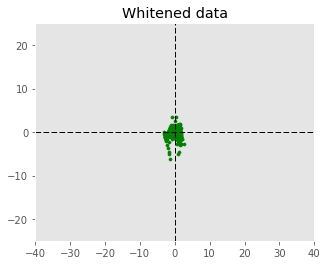

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(0, linestyle='--', color='black', linewidth=1) # horizontal lines
ax.axvline(0, linestyle='--',color='black', linewidth=1)
ax.set_xlim([-40,40])
ax.set_ylim([-25, 25])
# ax.set_xticks([0])
# ax.set_yticks(np.arange(0.1,0.1))
plt.scatter(Xwhite[:,0], Xwhite[:,1], s=10, color='green')
plt.title("Whitened data")
plt.grid(False)
plt.show()